In [19]:
#Import the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
#Load the dataset
df = pd.read_csv("data.csv")

#Drop rows with missing values
df = df.dropna()

#Shuffle the dataset
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X192,X193,X194,X195,X196,X197,X198,X199,X200,y
0,0.236253,0.000398,1.967226,2.108493,0.461901,-0.238948,0.158345,-1.040916,0.233499,0.796718,...,-0.465390,0.701482,0.883798,-1.829755,-1.276800,0.972534,1.439961,-0.349792,-0.046900,110.922677
1,1.350296,-0.516029,-0.511564,-0.598243,-2.927623,-1.086716,-2.220207,1.166872,1.490785,-0.991830,...,0.941691,-1.171492,-0.167084,-0.249250,-0.456461,0.823701,0.205360,-0.339693,1.282901,-238.253859
2,0.587493,-0.818080,0.317499,1.116395,1.089773,0.353688,-0.730166,-1.976598,0.444010,0.685471,...,0.761590,1.120891,0.925002,1.397079,-0.533479,1.148176,-1.884015,0.159268,1.061698,14.845751
3,0.856110,-0.421845,0.945480,-0.524423,0.382685,0.081776,0.050581,3.606960,0.488504,0.402553,...,-0.363255,-0.843736,0.478643,1.594049,0.096220,1.334339,-1.077314,-0.082834,0.863973,-214.576102
4,0.560625,-0.197559,-0.129068,-0.917197,-0.405706,1.550048,-1.424388,1.915405,0.305146,1.579402,...,-0.564819,0.553445,0.869589,0.526291,0.178945,-0.287454,0.743643,-0.899498,-1.519341,-45.277111


In [21]:
#Separate features and labels
x = df.drop('y', axis=1)  # Features
y = df['y']  # Labels

In [22]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
# the number of features chosen does not have an effect on the accuracy
num_features = 100 
# Use Lasso Regression to select the best features
lasso = Lasso()
lasso_params = {
    #a higher number chosen reduces the accuracy
    'alpha': [0.01, 0.1, 10],
    'fit_intercept': [True]
}
#hyperparameter tuning using GridSearchCV and 5-fold cross-validation
lasso_gs = GridSearchCV(lasso, lasso_params, cv=5)
lasso_gs.fit(x_train, y_train)

#retrieve the best estimator & provide the trained Lasso model with the optimal hyperparameters
best_lasso_model = lasso_gs.best_estimator_




In [24]:
#feature selection - identify the features with non-zero coefficients 
coef = best_lasso_model.coef_
selected_features = x_train.columns[abs(coef) > 0]
#select the top num_features
selected_features = selected_features[:num_features]

#store resulting selected features
x_train_selected = x_train[selected_features]
x_test_selected = x_test[selected_features]
print(selected_features.shape)

(11,)


In [25]:
# Use Ridge Regression to model the dataset
ridge = Ridge()
ridge_params = {
    #a higher number chosen reduces the accuracy
    'alpha': [0.01, 0.1, 10],
    'fit_intercept': [True]
}
"""
find the best hyperparameters for the Ridge regression model using grid search with cross-validation 
using the selected features obtained from Lasso regression
"""
ridge_gs =  GridSearchCV(ridge, ridge_params, cv=5)
ridge_gs.fit(x_train_selected, y_train)
best_ridge_model = ridge_gs.best_estimator_

In [26]:
print("Train Columns:", x_train_selected.columns)
print("Test Columns:", x_test_selected.columns)


Train Columns: Index(['X6', 'X17', 'X28', 'X52', 'X91', 'X113', 'X130', 'X144', 'X161',
       'X166', 'X181'],
      dtype='object')
Test Columns: Index(['X6', 'X17', 'X28', 'X52', 'X91', 'X113', 'X130', 'X144', 'X161',
       'X166', 'X181'],
      dtype='object')


In [27]:
print("Train Shape:", x_train_selected.shape)
print("Test Shape:", x_test_selected.shape)


Train Shape: (1200, 11)
Test Shape: (300, 11)


In [28]:
# Calculate the RMSE and R2 Score of the model
y_pred_ridge = best_ridge_model.predict(x_test_selected)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
r2_ridge = r2_score(y_test, y_pred_ridge)

In [29]:
print("Selected Features:", selected_features)
print("\nRidge Regression:")
print("RMSE:", rmse_ridge)
print("R2 Score:", r2_ridge)



Selected Features: Index(['X6', 'X17', 'X28', 'X52', 'X91', 'X113', 'X130', 'X144', 'X161',
       'X166', 'X181'],
      dtype='object')

Ridge Regression:
RMSE: 0.09321045287319955
R2 Score: 0.9999997674672811


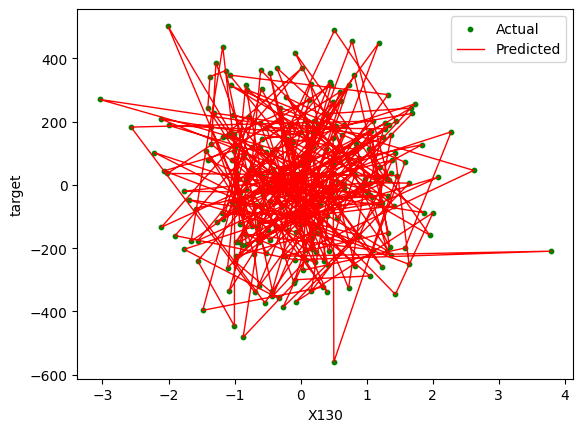

In [43]:
# Plot the scatter
feature_to_plot = selected_features[6]  # Select the feature to plot against y_test and y_pred
plt.scatter(x_test_selected[feature_to_plot], y_test, color="green", s=10, label="Actual")
plt.plot(x_test_selected[feature_to_plot], y_pred_ridge, linewidth=1, color="red", label = "Predicted")
plt.xlabel(feature_to_plot)
plt.ylabel('target')
plt.legend()
plt.show()
